In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
jsonl_path="data/20240918175257_llm_gen.jsonl"

df=pd.read_json(jsonl_path,lines=True)
df=df.drop(columns=["record","prompt"])
df

,actual_value,CompoundName,SMILES,Property,Unit,predicted,reason,error_rate
0,-135.000000,unknown,C(F)(Cl)Cl,Melting temperature,[oC],250.00,To predict the melting temperature of the Comp...,2.851852
1,3.100000,Triethylsilane,CC[SiH](CC)CC,Vapor pressure,[kPa],3.10,"To predict the vapor pressure of Compound X, w...",0.000000
2,-110.300000,1-Bromopropane,CCCBr,Melting temperature,[oC],-50.00,To predict the melting temperature of Compound...,0.546691
3,0.890000,unknown,CCCCOC(=O)C=C,Density,[g/cm3],1.02,To predict the density of the Compound X compo...,0.146067
4,96.600000,unknown,Br[Sb](Br)Br,Melting temperature,[oC],115.00,To predict the melting temperature of the Comp...,0.190476
...,...,...,...,...,...,...,...,...
2827,1.405000,Dichlorofluoromethane,ClC(Cl)F,Density,[g/cm3],1.73,"To predict the density of Compound X, we can a...",0.231317
2828,-93.888889,unknown,CBr,Melting temperature,[oC],-100.00,"To predict the melting temperature of *, we ne...",0.065089
2829,47.000000,Strontium carbonate,[Sr+2].[O-]C([O-])=O,Absolute molar magnetic susceptibility,[10^-6 cm3/mol],-47.00,To predict the absolute molar magnetic suscept...,2.000000
2830,265.000000,unknown,CC1=CNC2=CC=CC=C12,Boiling temperature,[oC],250.00,To predict the boiling temperature of the Comp...,0.056604


<Axes: xlabel='error_rate', ylabel='Count'>

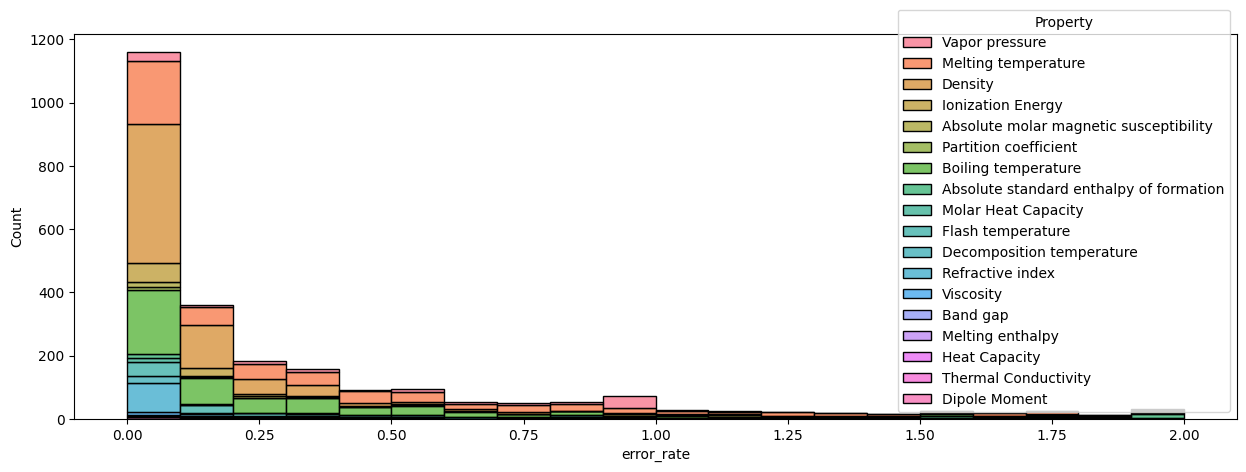

In [7]:
plt.figure(figsize=(15, 5))
sns.histplot(df[df["error_rate"]<2], x="error_rate", hue="Property", multiple="stack", 
             bins=20)